In [10]:
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

In [11]:
max_features = 20000
batch_size = 32
max_len = 80

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [12]:
model_layers_dict = {}
for neurons_in_embeding in [8, 16, 32, 64, 128]:
    model_layers_dict[neurons_in_embeding] = [
        Embedding(max_features, neurons_in_embeding),
        SimpleRNN(8, input_shape=(max_features,max_len)),
        Dense(1, activation='sigmoid'),
    ]

models = {}

for k, v in model_layers_dict.items():
    model = Sequential(v)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    models[k] = model
    print(k)
    model.summary()

8
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 8)           160000    
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 160,145
Trainable params: 160,145
Non-trainable params: 0
_________________________________________________________________
16
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 16)          320000    
                                                                 
 simple_rnn_11 (Sim

In [13]:
history_dict = {}
for k, model in tqdm(models.items()):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))
    history_dict[k] = history

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5
782/782 [==============================] - 17s 21ms/step - loss: 0.4952 - accuracy: 0.7604 - val_loss: 0.3941 - val_accuracy: 0.8280
Epoch 2/5
782/782 [==============================] - 17s 21ms/step - loss: 0.2997 - accuracy: 0.8810 - val_loss: 0.4014 - val_accuracy: 0.8305
Epoch 3/5
782/782 [==============================] - 14s 18ms/step - loss: 0.2131 - accuracy: 0.9211 - val_loss: 0.4330 - val_accuracy: 0.8250
Epoch 4/5
782/782 [==============================] - 14s 17ms/step - loss: 0.1549 - accuracy: 0.9468 - val_loss: 0.4699 - val_accuracy: 0.8170
Epoch 5/5
782/782 [==============================] - 14s 18ms/step - loss: 0.1057 - accuracy: 0.9677 - val_loss: 0.5152 - val_accuracy: 0.8108


 20%|██        | 1/5 [01:16<05:05, 76.26s/it]

Epoch 1/5
782/782 [==============================] - 17s 20ms/step - loss: 0.5523 - accuracy: 0.7057 - val_loss: 0.4339 - val_accuracy: 0.8069
Epoch 2/5
782/782 [==============================] - 16s 20ms/step - loss: 0.3324 - accuracy: 0.8629 - val_loss: 0.4139 - val_accuracy: 0.8145
Epoch 3/5
782/782 [==============================] - 15s 20ms/step - loss: 0.2116 - accuracy: 0.9231 - val_loss: 0.4518 - val_accuracy: 0.8079
Epoch 4/5
782/782 [==============================] - 16s 20ms/step - loss: 0.1354 - accuracy: 0.9555 - val_loss: 0.5206 - val_accuracy: 0.8088
Epoch 5/5
782/782 [==============================] - 15s 19ms/step - loss: 0.0837 - accuracy: 0.9740 - val_loss: 0.6532 - val_accuracy: 0.7990


 40%|████      | 2/5 [02:35<03:54, 78.15s/it]

Epoch 1/5
782/782 [==============================] - 20s 23ms/step - loss: 0.5287 - accuracy: 0.7268 - val_loss: 0.4361 - val_accuracy: 0.8064
Epoch 2/5
782/782 [==============================] - 17s 22ms/step - loss: 0.3069 - accuracy: 0.8780 - val_loss: 0.4188 - val_accuracy: 0.8196
Epoch 3/5
782/782 [==============================] - 18s 22ms/step - loss: 0.1925 - accuracy: 0.9293 - val_loss: 0.4490 - val_accuracy: 0.8081
Epoch 4/5
782/782 [==============================] - 17s 22ms/step - loss: 0.1102 - accuracy: 0.9637 - val_loss: 0.5513 - val_accuracy: 0.8040
Epoch 5/5
782/782 [==============================] - 19s 24ms/step - loss: 0.0712 - accuracy: 0.9783 - val_loss: 0.6236 - val_accuracy: 0.8011


 60%|██████    | 3/5 [04:05<02:47, 83.67s/it]

Epoch 1/5
782/782 [==============================] - 23s 28ms/step - loss: 0.5467 - accuracy: 0.7159 - val_loss: 0.4652 - val_accuracy: 0.7922
Epoch 2/5
782/782 [==============================] - 21s 27ms/step - loss: 0.3329 - accuracy: 0.8623 - val_loss: 0.4855 - val_accuracy: 0.7911
Epoch 3/5
782/782 [==============================] - 22s 28ms/step - loss: 0.1840 - accuracy: 0.9339 - val_loss: 0.5182 - val_accuracy: 0.7957
Epoch 4/5
782/782 [==============================] - 23s 30ms/step - loss: 0.0976 - accuracy: 0.9693 - val_loss: 0.6265 - val_accuracy: 0.7759
Epoch 5/5
782/782 [==============================] - 24s 30ms/step - loss: 0.0653 - accuracy: 0.9790 - val_loss: 0.6938 - val_accuracy: 0.7811


 80%|████████  | 4/5 [06:29<01:47, 107.15s/it]

Epoch 1/5
782/782 [==============================] - 33s 39ms/step - loss: 0.4635 - accuracy: 0.7875 - val_loss: 0.4115 - val_accuracy: 0.8210
Epoch 2/5
782/782 [==============================] - 31s 40ms/step - loss: 0.2780 - accuracy: 0.8914 - val_loss: 0.4347 - val_accuracy: 0.8147
Epoch 3/5
782/782 [==============================] - 30s 38ms/step - loss: 0.1724 - accuracy: 0.9382 - val_loss: 0.4917 - val_accuracy: 0.8050
Epoch 4/5
782/782 [==============================] - 31s 40ms/step - loss: 0.1090 - accuracy: 0.9638 - val_loss: 0.5653 - val_accuracy: 0.8034
Epoch 5/5
782/782 [==============================] - 31s 40ms/step - loss: 0.0747 - accuracy: 0.9761 - val_loss: 0.6510 - val_accuracy: 0.7960


100%|██████████| 5/5 [09:05<00:00, 109.02s/it]


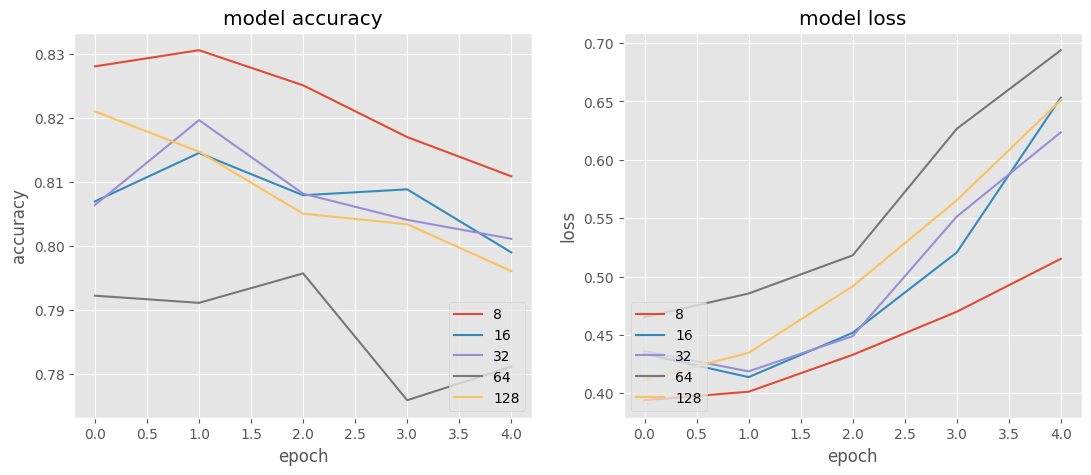

In [14]:
plt.style.use('ggplot')
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

for k, history in history_dict.items():
    plt.sca(axis[0])
    plt.plot(history.history['val_accuracy'], label=k)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='lower right')

    plt.sca(axis[1])
    plt.plot(history.history['val_loss'], label=k)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='lower left')
plt.savefig(f'plots/'+ " ".join([str(x) for x in models.keys()]) + '.png');